<a href="https://colab.research.google.com/github/ParraFinCode/expert-enigma/blob/main/Quant_Stock_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Set up environment

Note: import yfinance and use pdr_override so that returned data is the same as pandas_datareader pdr.get_data_yahoo()

In [67]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams ['figure.figsize']=8,6
import seaborn as sb
sb.set()

2. Download stock price data, store it in dataframe

In [68]:
jpm = pdr.get_data_yahoo('JPM',start = '2020-01-01', end = '2023-07-11')

[*********************100%***********************]  1 of 1 completed


In [69]:
jpm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,139.789993,141.100006,139.259995,141.089996,125.942879,10803700
2020-01-03,137.500000,139.229996,137.080002,138.339996,124.280884,10386800
2020-01-06,136.559998,138.270004,136.500000,138.229996,124.182068,10259000
2020-01-07,137.279999,137.860001,135.820007,135.880005,122.070915,10531300
2020-01-08,135.699997,137.580002,135.600006,136.940002,123.023193,9695300


In [98]:
jpm_close = jpm['Adj Close']
jpm_return = round(np.log(jpm_close).diff()*100,2)
jpm_return.head()

Date
2020-01-02     NaN
2020-01-03   -1.33
2020-01-06   -0.08
2020-01-07   -1.71
2020-01-08    0.78
Name: Adj Close, dtype: float64

<Axes: xlabel='Date'>

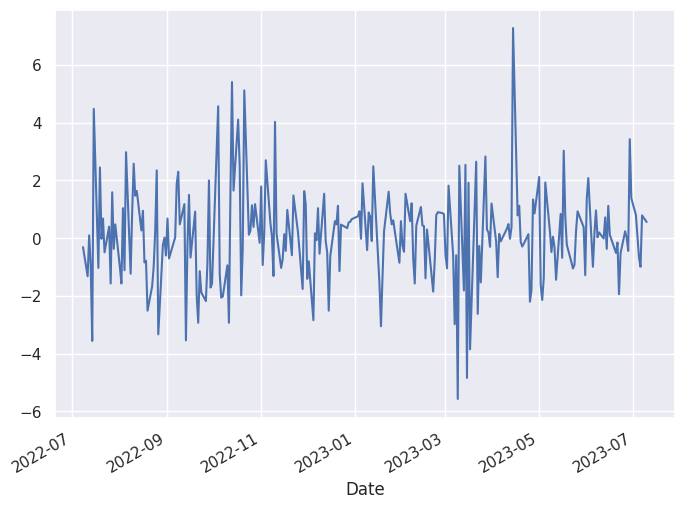

In [71]:
jpm_return[-252:].plot()

In [72]:
jpm_return.dropna(inplace = True)
jpm_return.describe()

count    884.000000
mean       0.016063
std        2.280486
min      -16.210000
25%       -1.052500
50%       -0.010000
75%        1.130000
max       16.560000
Name: Adj Close, dtype: float64

In [73]:
from scipy import stats

In [74]:
n, minmax, mean, var, skew, kurt = stats.describe (jpm_return)
mini, maxi = minmax
std = var ** .5

In [75]:
from scipy.stats import norm

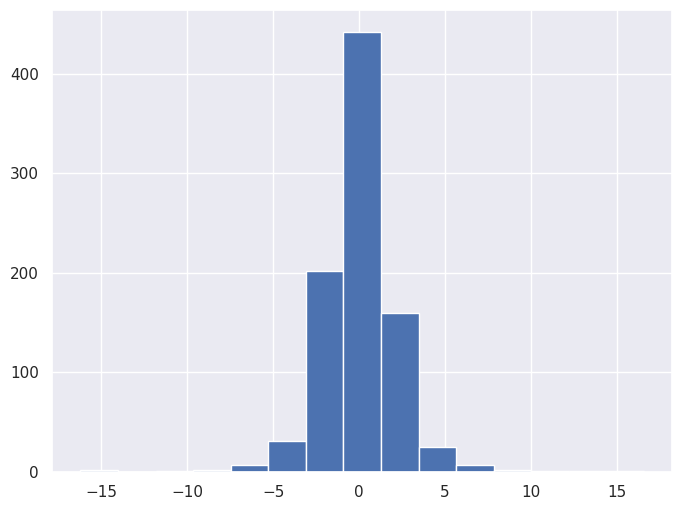

In [76]:
plt.hist(jpm_return, bins = 15);

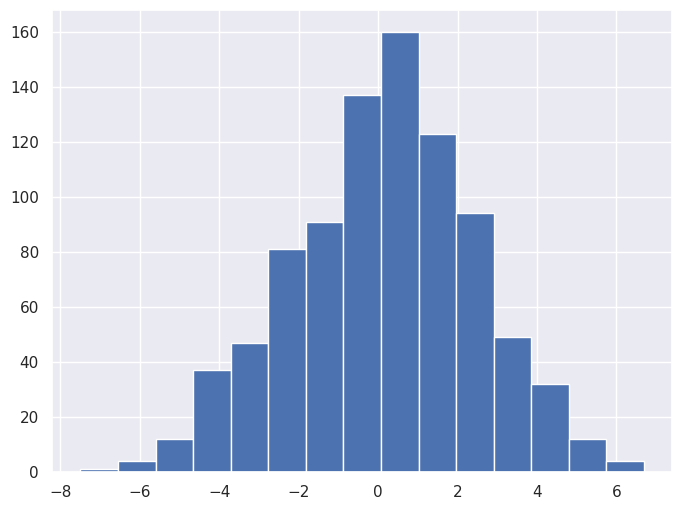

In [77]:
from scipy.stats import norm
x = norm.rvs(mean, std, n)
plt.hist(x, bins = 15);

In [78]:
x_test = stats.kurtosistest(x)
jpm_test = stats.kurtosistest(jpm_return)
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"*30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"JPM:{jpm_test[0]:13.2f}{jpm_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:            -0.83          0.4045
JPM:        13.04          0.0000


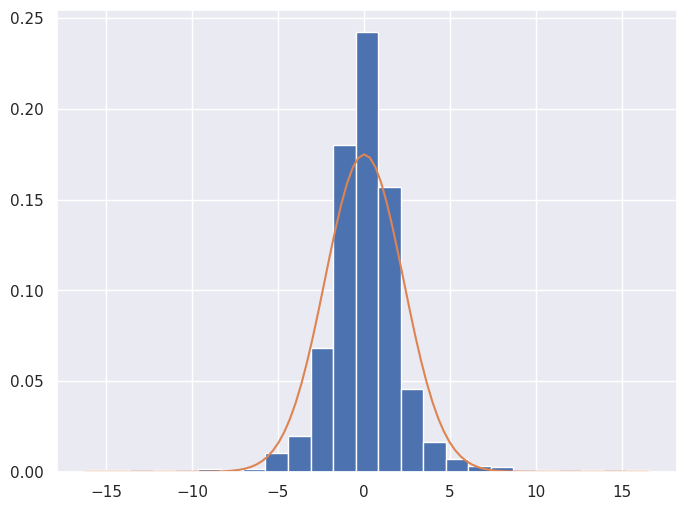

In [79]:
plt.hist(jpm_return, bins = 25, edgecolor = 'w', density = True)
overlay = np.linspace(mini, maxi, 100)
plt.plot(overlay, norm.pdf(overlay, mean, std));

Is daily price change significantly different from zero?

In [80]:
stats.ttest_1samp(jpm_return.sample(252), 0, alternative = 'two-sided')

TtestResult(statistic=-1.2332782894321448, pvalue=0.21862566187316562, df=251)

In [90]:
jpm_close.head()

,Close,lag_1,lag_2


In [109]:
jpm_close = jpm['Adj Close']
jpm_close = pd.DataFrame(jpm_close, columns = ['Adj Close'])
jpm_close.rename(columns = {'Adj Close':'Close'}, inplace = True)
jpm_close['lag_1'] = jpm_close.Close.shift(1)
jpm_close['lag_2'] = jpm_close.Close.shift(2)
jpm_close.dropna(inplace=True)
jpm_close.head()

,Close,lag_1,lag_2
Date,,,
2020-01-06,124.182068,124.280884,125.942879
2020-01-07,122.070915,124.182068,124.280884
2020-01-08,123.023193,122.070915,124.182068
2020-01-09,123.472374,123.023193,122.070915
2020-01-10,122.241615,123.472374,123.023193


In [120]:
lr = np.linalg.lstsq(jpm_close[['lag_1','lag_2']], jpm_close['Close'], rcond=None)[0]

In [121]:
jpm_close['predict']=np.dot(jpm_close[['lag_1','lag_2']], lr)
jpm_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
2020-01-06,124.182068,124.280884,125.942879,124.396342
2020-01-07,122.070915,124.182068,124.280884,124.193442
2020-01-08,123.023193,122.070915,124.182068,122.216194
2020-01-09,123.472374,123.023193,122.070915,122.964538
2020-01-10,122.241615,123.472374,123.023193,123.447234


<Axes: xlabel='Date'>

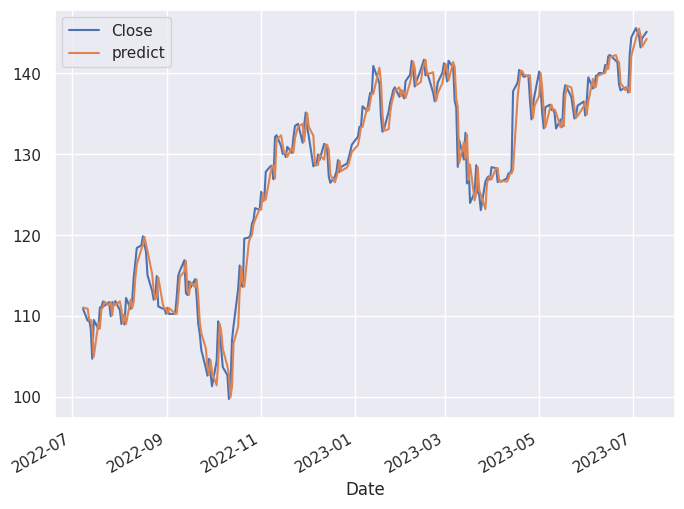

In [123]:
jpm_close.iloc[-252:][['Close','predict']].plot()